# OpenCV Face and Smile Detection HDMI

In this notebook, opencv face and smile detection will be applied to HDMI input images.

To run all cells in this notebook a HDMI input source and HDMI output monitor are required.

Download folder from given Github and upload in your jupyter notebook

References:https://github.com/opencv/opencv/tree/master/data/haarcascades

### Step 1: Load the overlay

The base overlay ("base.bit") can be considered like a reference design for a board

An overlay usually includes:

1) A bitstream to configure the FPGA fabric

2) A Vivado design Tcl file to determine the available IP

3) Python API that exposes the IPs as attributes



In [11]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *

# overlay is instantiated by specifying the name of the bitstream file 
# ("base.bit") 

base = BaseOverlay("base.bit") 

#Initialization hdmi_in & hdmi_out

hdmi_in = base.video.hdmi_in
hdmi_out = base.video.hdmi_out

### Step 2: Initialize HDMI I/O

In [12]:
hdmi_in.configure(PIXEL_RGB)
hdmi_out.configure(hdmi_in.mode, PIXEL_RGB)

# Execution
# Once the HDMI controllers have been configured, they can be started

hdmi_in.start()
hdmi_out.start()

### Step 3: Show input frame using IPython Image

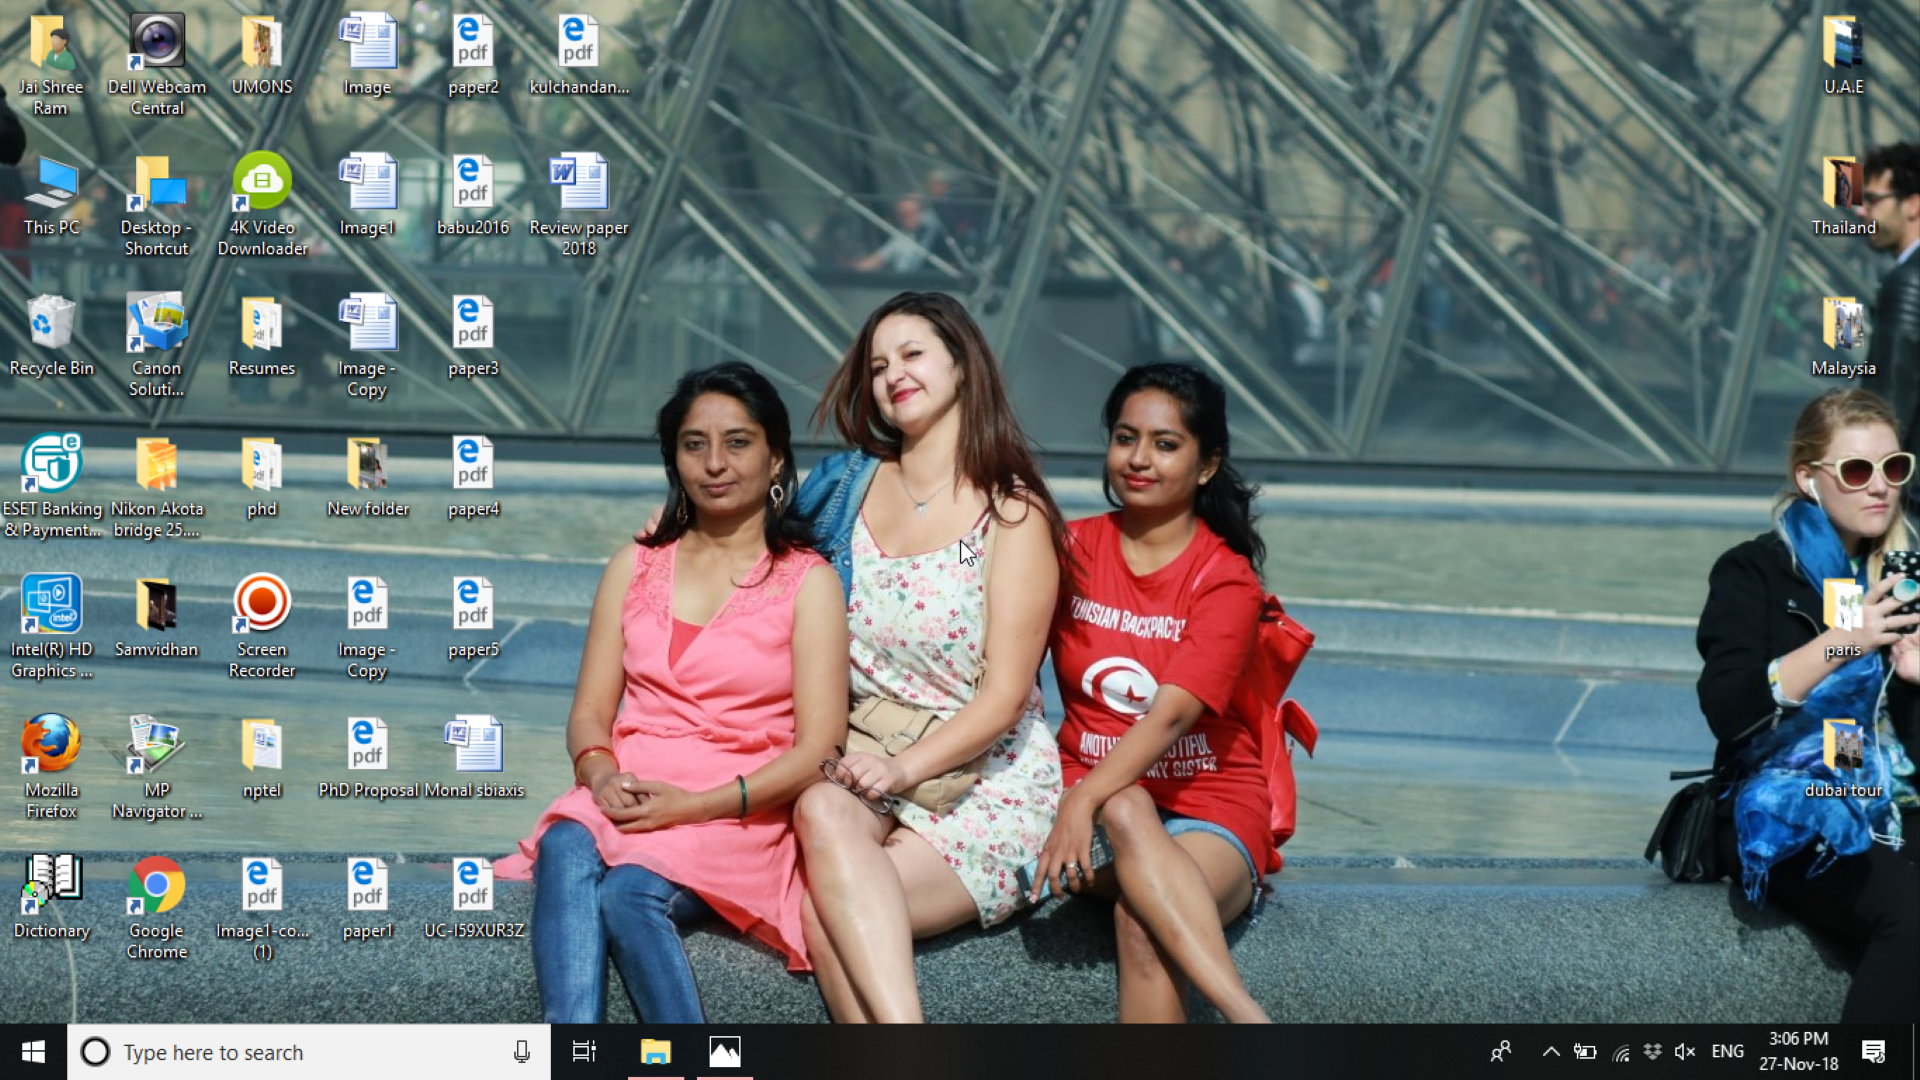

In [13]:
import PIL.Image

#frames can read from the input

frame = hdmi_in.readframe()
img = PIL.Image.fromarray(frame)

#Image Save

img.save("/home/xilinx/jupyter_notebooks/base/video/data/face_detect.jpg")

img

### Step 4: Apply the face and Smile detection to the input


In [14]:
#OpenCV installed and import OpenCV 

import cv2
import numpy as np

frame = hdmi_in.readframe()


#You need to download resource file from github (https://github.com/opencv/opencv/tree/master/data/haarcascades) 

#for face detect

face_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/'
    'haarcascade_frontalface_default.xml')

#for Smile detect

smile_cascade = cv2.CascadeClassifier(
    '/home/xilinx/jupyter_notebooks/base/video/data/haarcascade_smile.xml')

# Haarcascade classifiersupport support gray sclae image so 
# we need convert colour image to gray scale.  

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

#for face detect

faces = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    
#for Smile detect

    smile = smile_cascade.detectMultiScale(roi_gray)
    for (sx,sy,sw,sh) in smile:
        cv2.rectangle(roi_color,(sx,sy),(sx+sw,sy+sh),(0,255,0),2)
        
       

### Step 5: Show results on HDMI output

In [18]:
# This would allow some processing to be carried out on the HDMI-in frame 
# before writing it to the HDMI-out

hdmi_out.writeframe(frame)

### Step 6: Show results within notebook
Output OpenCV results as JPEG.

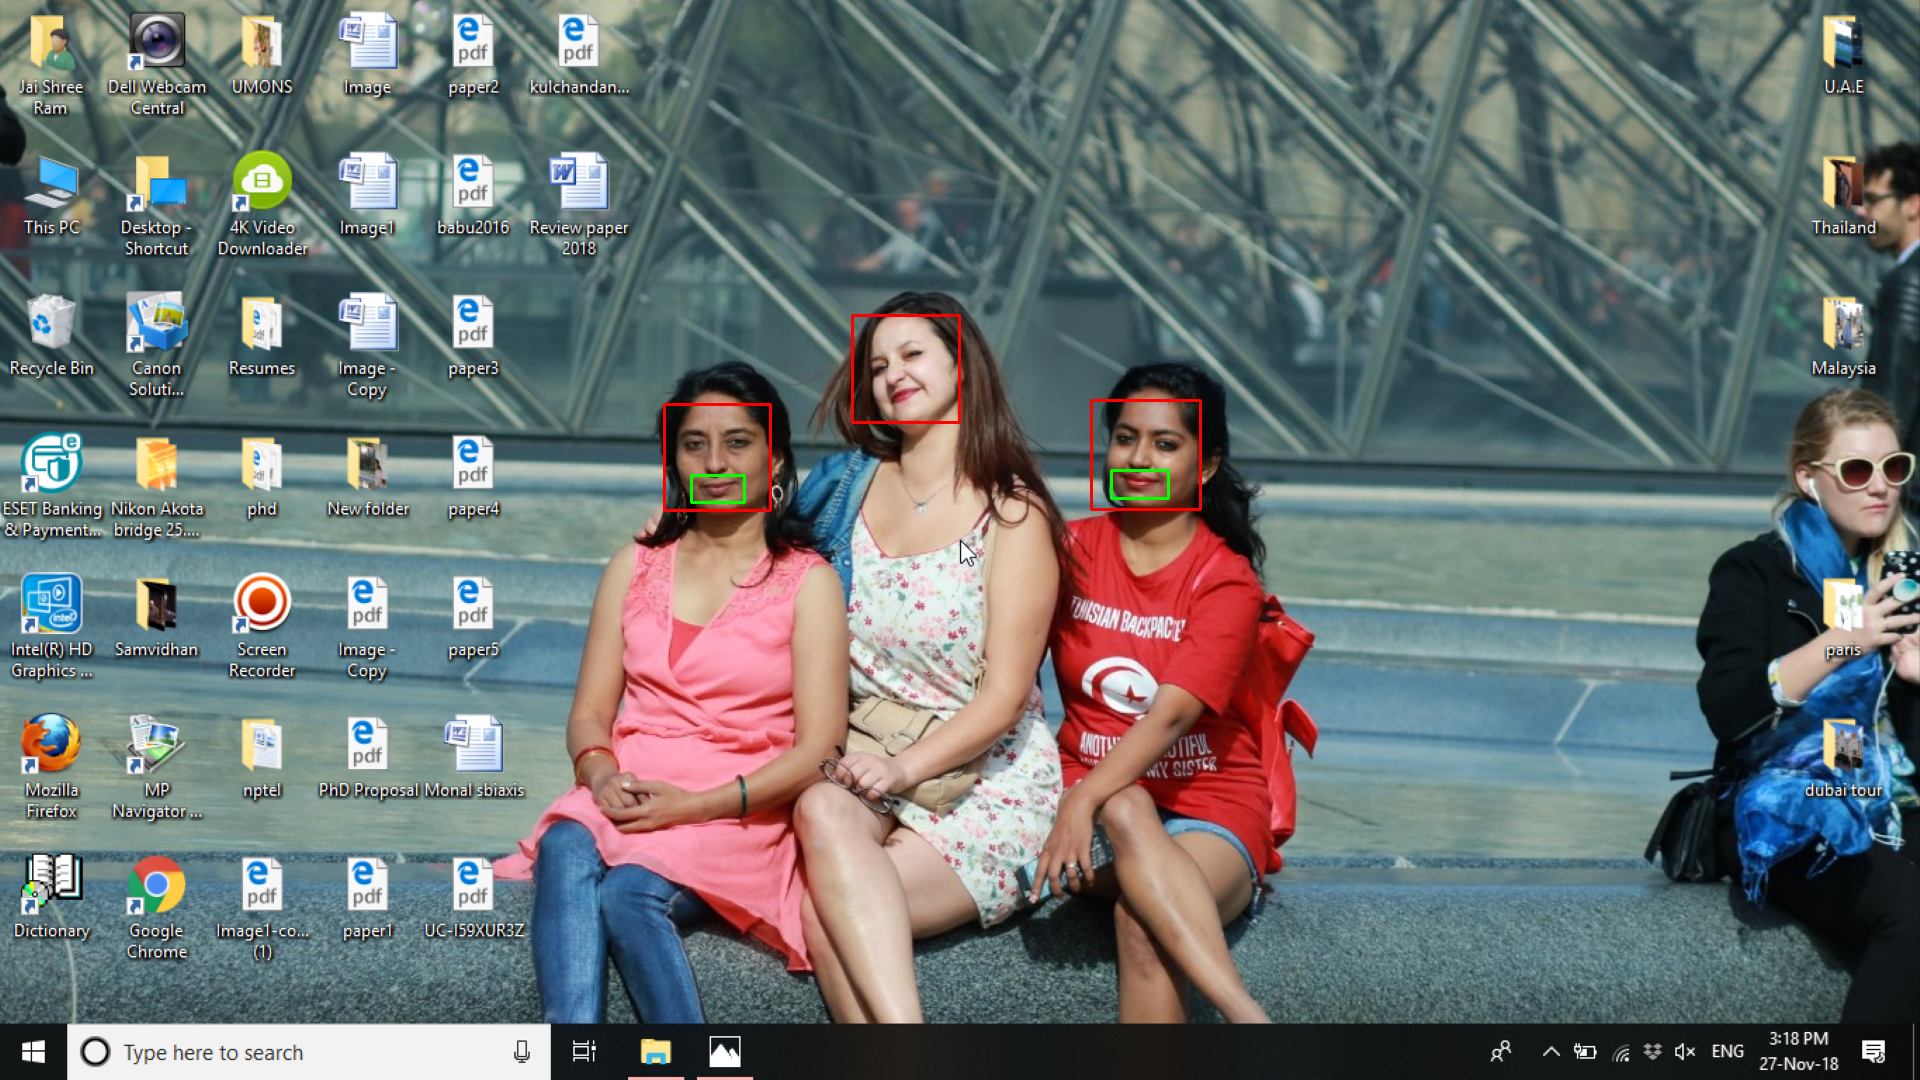

In [19]:
img = PIL.Image.fromarray(frame)
img.save("/home/xilinx/jupyter_notebooks/base/video/data/face_detect.jpg")

img

### Step 7: Release HDMI

In [10]:
# The last step is always to stop the controllers and delete HDMI objects.

hdmi_out.stop()
hdmi_in.stop()
del hdmi_in, hdmi_out